# Impacts of not removing outliers on a dataset

Recently, I was doing a project and I forgot to remove outliers. Failing to remove outliers is a mistake that every begginer makes. I heard several times that cleaning the database before making analysis is crucial, but I never saw the difference with my own eyes.<br>
Therefore, I created this notebook to see how failing to remove outliers can make a model perform considerably worst. I will use a linear regression to demonstrate the concept.

In [1]:
# let's first import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

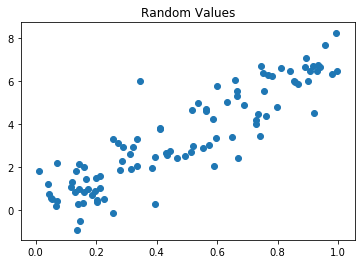

In [46]:
# creating a random set of linear numbers
X = np.random.random(100)
y = 7*X + np.random.randn(100)

# let's visualize our data
plt.scatter(X,y)
plt.title("Random Values")
plt.show()

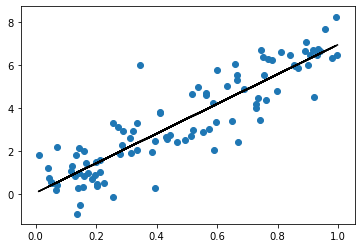

R² = 0.8


In [47]:
# now let's make the linear regression

# reshaping
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# fitting the curve
model1 = LinearRegression()
model1.fit(X,y)

# let's see our model
plt.scatter(X, y)
plt.plot(X, model1.predict(X),color='k')
plt.show()

# let's evaluate the model
print(f"R² = {r2_score(y,model1.predict(X)).round(2)}")

**Now we will introduce some outliers and see how the regression changes**

There are [5] verified outliers. 
They were grouped into the X_final and y_final
Outliers in red


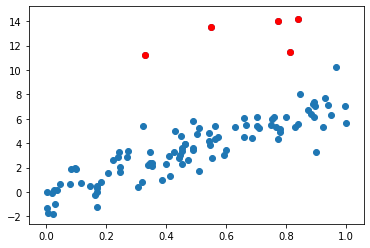

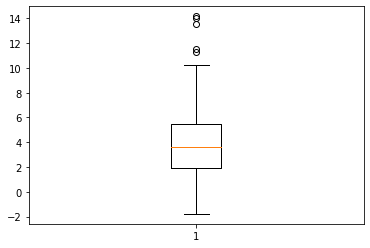

In [45]:
# how do we ensure that random generated values are considered outliers?
lever  = True
multiplier = 10 # change this value to generate outliers closer or distant


while lever:
    # 1st: generate the values
    X_outliers = np.random.random(5)
    y_outliers = 7*X_outliers + np.random.rand(5)*multiplier

    # 2nd: concatenate the outliers to a copy of the original data
    X_copy = X.copy()  # copying
    X_outliers = X_outliers.reshape(-1, 1)  # reshaping
    new_X = np.concatenate((X_copy, X_outliers))  # concatenating

    y_copy = y.copy()  # copying
    y_outliers = y_outliers.reshape(-1, 1)  # reshaping
    new_y = np.concatenate((y_copy, y_outliers))  # concatenating

    # 3rd: verifying if they're outliers
    upper_quartile = np.percentile(new_y, 75)
    lower_quartile = np.percentile(new_y, 25)
    IQR = (upper_quartile - lower_quartile)
    condition = np.logical_or(new_y > upper_quartile +
                              1.5*IQR, new_y < lower_quartile - 1.5*IQR)
    if sum(condition) == 5:
        X_final = np.concatenate((X, X_outliers))
        y_final = np.concatenate((y, y_outliers))
        print(f"There are {sum(condition)} verified outliers. \nThey were grouped into the X_final and y_final\nOutliers in red.")
        plt.scatter(X_final, y_final)
        plt.scatter(X_outliers, y_outliers, color = "red")
        plt.show()
        plt.boxplot(y_final)
        lever = False

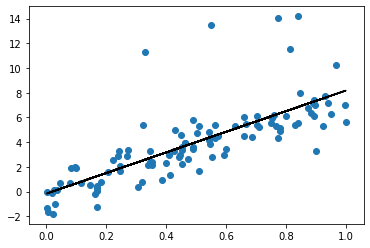

R² = 0.58


In [48]:
# fitting the linear regression
model2 = LinearRegression()
model2.fit(X_final,y_final)

# showing curve
plt.scatter(X_final,y_final)
plt.plot(X_final,model2.predict(X_final), color = "black")
plt.show()

# evaluating model
print(f"R² = {r2_score(y_final,model2.predict(X_final)).round(2)}")

# Now that we have a functioning code, let's simulate this 300 times to see how the linear regression model performs with and without outliers

In [72]:
r2_model1 = []
r2_model2 = []

for i in range(300):
    
    # creating a random set of linear numbers
    X = np.random.random(100)
    y = 7*X + np.random.randn(100)

    # reshaping
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)

    # fitting the curve without outliers
    model1 = LinearRegression()
    model1.fit(X,y)
    r2_model1.append(r2_score(y,model1.predict(X)).round(2)) # evaluating model

    # generating verified outliers
    lever  = True
    while lever:
        # 1st: generate the values
        X_outliers = np.random.random(5)
        y_outliers = 7*X_outliers + np.random.rand(5)*10

        # 2nd: concatenate the outliers to a copy of the original data
        X_copy = X.copy()  # copying
        X_outliers = X_outliers.reshape(-1, 1)  # reshaping
        new_X = np.concatenate((X_copy, X_outliers))  # concatenating

        y_copy = y.copy()  # copying
        y_outliers = y_outliers.reshape(-1, 1)  # reshaping
        new_y = np.concatenate((y_copy, y_outliers))  # concatenating

        # 3rd: verifying if they're outliers
        upper_quartile = np.percentile(new_y, 75)
        lower_quartile = np.percentile(new_y, 25)
        IQR = (upper_quartile - lower_quartile)
        condition = np.logical_or(new_y > upper_quartile +
                                  1.5*IQR, new_y < lower_quartile - 1.5*IQR)
        if sum(condition) == 5:
            X_final = np.concatenate((X, X_outliers))
            y_final = np.concatenate((y, y_outliers))
            lever = False

    # fitting the linear regression for the data with outliers
    model2 = LinearRegression()
    model2.fit(X_final,y_final)
    r2_model2.append(r2_score(y_final,model2.predict(X_final)).round(2)) # evaluating model

Without outliers:
Standard Deviation: 0.03
Mean: 0.8

With outliers:
Standard Deviation: 0.06
Mean: 0.57


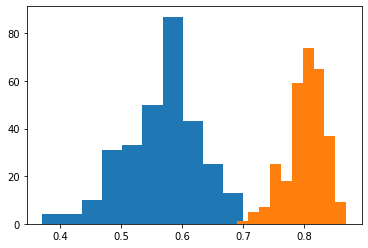

In [75]:
#evaluating results

# transforming into arrays
r2_model1 = np.array(r2_model1)
r2_model2 = np.array(r2_model2)

# showing histogram
plt.hist(r2_model2)
plt.hist(r2_model1)

# summarizing
print(f"Without outliers:\nStandard Deviation: {np.std(r2_model1).round(2)}\nMean: {np.mean(r2_model1).round(2)}\n")
print(f"With outliers:\nStandard Deviation: {np.std(r2_model2).round(2)}\nMean: {np.mean(r2_model2).round(2)}")

# Conclusion

After simulating 600 linear regressions, we can see how the fit differs when we forget to exclude outliers.<br>
In this simulated data, the average R² for the dataset with outliers is 0.57 while the average R² for the dataset without outliers is 0.80. This test is not absolutely scientific, the goal here was just to give us an idea of what happens when we don't clean the database.<br>
In other words, **by including only 5 outliers in a dataset of 100 values, the fit suffered approximately 30% of loss.**<br>
So you should never forget to clean the database!  :)